In [422]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc



Вывод данных

In [423]:
trein = pd.read_csv('../csv_file/train.csv')
test = pd.read_csv("../csv_file/valid.csv")


C:\Users\josha\AppData\Local\Temp\ipykernel_7612\697948620.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,

Проверка данных на их наличие

In [424]:
trein.head(5)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [425]:
test.head(5)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348


Очтстка данных для 1 модели

СТОЛБИКИ

In [426]:
threshold = 0.60
ydal = int(len(trein) * (1 - threshold))
df_tren = trein.dropna(axis=1,thresh=ydal)
print(trein)


      report_date  client_id  target  col1  col2  col3  col4  col5  col6  \
0      2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   
1      2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   
2      2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   
3      2022-09-01          7       0   NaN   NaN   NaN   NaN   NaN   NaN   
4      2022-08-01          8       0   NaN   NaN   NaN   NaN   NaN   NaN   
...           ...        ...     ...   ...   ...   ...   ...   ...   ...   
14451  2022-07-01       1241       0   NaN   NaN   NaN   NaN   NaN   NaN   
14452  2022-09-01       1969       1   NaN   NaN   NaN   NaN   NaN   NaN   
14453  2022-02-01       7116       1   NaN   NaN   NaN   NaN   NaN   NaN   
14454  2021-08-01       7117       0   NaN   NaN   NaN   NaN   NaN   NaN   
14455  2022-03-01        849       0   NaN   NaN   NaN   NaN   NaN   NaN   

       col7  ...    col2654    col2655    col2656  col2657  col2658  col2659  \
0      

In [427]:
print(df_tren)

      report_date  client_id  target  col1453  \
0      2022-11-01          1       0        0   
1      2022-11-01          5       0        1   
2      2022-05-01          6       0        0   
3      2022-09-01          7       0        0   
4      2022-08-01          8       0        0   
...           ...        ...     ...      ...   
14451  2022-07-01       1241       0        0   
14452  2022-09-01       1969       1        0   
14453  2022-02-01       7116       1        0   
14454  2021-08-01       7117       0        0   
14455  2022-03-01        849       0        0   

                                    col1454  col1455  col1456  col1457  \
0      00f3d719-a6ec-4960-ba01-8372eb705443      0.0      0.0      0.0   
1      01febac0-b083-494e-8589-f98400074b94      0.0      0.0      0.0   
2      0278175e-c0bb-4e1e-bfe5-20db6811d3e2      0.0      0.0      0.0   
3      0364571d-5325-ed11-b823-005056b825cd      1.0      1.0      1.0   
4      065957a6-9b2a-435a-b561-024e9e8d9a

In [428]:
df = df_tren.loc[:, ~df_tren.T.duplicated()]

In [429]:
print(df)

      report_date  client_id  target  col1453  \
0      2022-11-01          1       0        0   
1      2022-11-01          5       0        1   
2      2022-05-01          6       0        0   
3      2022-09-01          7       0        0   
4      2022-08-01          8       0        0   
...           ...        ...     ...      ...   
14451  2022-07-01       1241       0        0   
14452  2022-09-01       1969       1        0   
14453  2022-02-01       7116       1        0   
14454  2021-08-01       7117       0        0   
14455  2022-03-01        849       0        0   

                                    col1454  col1455  col1456  col1457  \
0      00f3d719-a6ec-4960-ba01-8372eb705443      0.0      0.0      0.0   
1      01febac0-b083-494e-8589-f98400074b94      0.0      0.0      0.0   
2      0278175e-c0bb-4e1e-bfe5-20db6811d3e2      0.0      0.0      0.0   
3      0364571d-5325-ed11-b823-005056b825cd      1.0      1.0      1.0   
4      065957a6-9b2a-435a-b561-024e9e8d9a

In [430]:
missing_data = df.isnull().sum()
missing_data_filtered = missing_data[missing_data > 0]
missing_data_filtered

col1454       1
col1455    3337
col1456    3337
col1457    3337
col1458    3337
           ... 
col2655    8249
col2656    8249
col2660    6420
col2661    6420
col2662    6420
Length: 186, dtype: int64

СТРОКИ


In [431]:
df_sorted = df.sort_values(by='client_id', ascending=False)
# dubl = df['client_id'].value_counts()[df['client_id'].value_counts() > 1].index
# dubl_list = dubl.tolist()
# print("Дублирующиеся значения client_id:", dubl_list)
# df_cleaned = df[~df['client_id'].isin(dubl_list)]
# print(df_cleaned)
df_sorted

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
14446,2022-10-01,8302,0,0,f99a16a8-c0ef-ec11-b822-005056b8a6c4,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14434,2023-02-01,8296,0,0,eb4322a5-4650-ed11-b823-005056b825cd,0.0,0.0,0.0,0.0,1.0,...,180.0,180.0,180.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,0.257217
14417,2023-01-01,8294,0,1,e1691d85-fbc5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,0.258007
14391,2022-12-01,8289,0,0,d1f4cf5b-9554-4af3-96b7-816d29c3d606,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
14368,2022-06-01,8279,0,0,b8ed4202-c722-434b-bd14-77d2a2b96045,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,2022-11-01,2,0,1,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,1.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
4718,2021-12-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
12132,2021-10-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
6471,2022-06-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [432]:
df_sorted = df.sort_values(by='client_id', ascending=False)
dubl = df_sorted['client_id'].value_counts()[df_sorted['client_id'].value_counts() > 1].index
dubl_list = dubl.tolist()
print("Дублирующиеся значения client_id:", dubl_list)
df_cleaned = df_sorted[df_sorted.duplicated('client_id', keep='first') == False]
print(df_cleaned)

Дублирующиеся значения client_id: [50, 806, 615, 1559, 49, 663, 105, 2185, 1750, 4645, 2256, 1973, 434, 70, 766, 3691, 264, 3302, 1584, 1943, 1542, 3345, 491, 4494, 2041, 1810, 2010, 3462, 1695, 498, 3385, 641, 2763, 2098, 4383, 359, 258, 670, 1190, 3070, 2883, 897, 2967, 2773, 1491, 3131, 2753, 1276, 613, 1435, 595, 559, 1260, 650, 1015, 1185, 588, 2712, 3186, 176, 916, 1003, 944, 990, 1179, 32, 844, 970, 2900, 2991, 2974, 1795, 552, 4916, 461, 568, 4042, 197, 1849, 1944, 1866, 2600, 1791, 4784, 1708, 2289, 387, 2194, 401, 362, 274, 276, 2371, 2368, 248, 3793, 3785, 2433, 3544, 2304, 291, 2389, 3585, 321, 2817, 2476, 205, 776, 24, 64, 42, 69, 433, 762, 761, 6288, 443, 46, 856, 4000, 53, 1722, 2923, 872, 6160, 3045, 1693, 4735, 3061, 526, 2092, 536, 4127, 1638, 828, 4846, 797, 554, 3257, 3746, 307, 3286, 3488, 231, 233, 3143, 541, 3645, 3654, 1448, 283, 285, 1449, 1427, 1379, 4073, 1523, 2300, 2302, 1386, 1373, 3777, 4272, 1967, 246, 3627, 1349, 1275, 2711, 3682, 177, 271, 2313, 1907, 

наверное для тестовой модели можно и не мучатся с заполнением верным пропусков

In [433]:
issing_data = df_cleaned.isnull().sum()
issing_data_filtered = issing_data[missing_data > 0]
issing_data_filtered

col1454       0
col1455     841
col1456     841
col1457     841
col1458     841
           ... 
col2655    2457
col2656    2457
col2660    1903
col2661    1903
col2662    1903
Length: 186, dtype: int64

In [434]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        mode_value = df_cleaned[col].mode()[0]
    else:
        mode_value = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_value, inplace=True)
print(df_cleaned.isnull().sum()) 

report_date    0
client_id      0
target         0
col1453        0
col1454        0
              ..
col2656        0
col2660        0
col2661        0
col2662        0
col2663        0
Length: 191, dtype: int64


C:\Users\josha\AppData\Local\Temp\ipykernel_7612\930509317.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_value, inplace=True)
C:\Users\josha\AppData\Local\Temp\ipykernel_7612\930509317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(mode_value, inplace=True)
C:\Users\josha\AppData\Lo

In [435]:

count_ones = df_cleaned['target'].sum()


<Axes: >

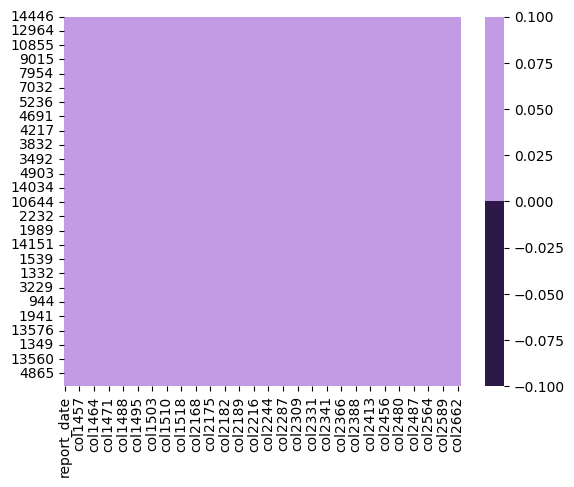

In [436]:
cols = df_cleaned.columns

colours = ['#2c1948', '#c39be4']
sns.heatmap(df_cleaned[cols].isnull(), cmap=sns.color_palette(colours))

In [437]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 14446 to 4718
Columns: 191 entries, report_date to col2663
dtypes: float64(186), int64(3), object(2)
memory usage: 7.1+ MB


In [438]:
label_encoder = LabelEncoder()
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

C:\Users\josha\AppData\Local\Temp\ipykernel_7612\1355014453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
C:\Users\josha\AppData\Local\Temp\ipykernel_7612\1355014453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])


In [439]:
print(df_cleaned.head(5))


       report_date  client_id  target  col1453  col1454  col1455  col1456  \
14446           20       8302       0        0     4698      0.0      0.0   
14434           24       8296       0        0     4422      0.0      0.0   
14417           23       8294       0        1     4217      0.0      0.0   
14391           22       8289       0        0     3931      0.0      0.0   
14368           16       8279       0        0     3478      0.0      0.0   

       col1457  col1458  col1459  ...  col2588  col2589  col2590    col2654  \
14446      0.0      0.0      1.0  ...    360.0    360.0    360.0  8577000.0   
14434      0.0      0.0      1.0  ...    180.0    180.0    180.0  3300000.0   
14417      0.0      0.0      0.0  ...    300.0    300.0    300.0  6868510.0   
14391      0.0      0.0      0.0  ...    360.0    360.0    360.0  3000000.0   
14368      0.0      0.0      1.0  ...    360.0    360.0    360.0  3000000.0   

         col2655    col2656    col2660    col2661    col2662  

In [440]:
threshold = 0.1


low_corr_columns = df_cleaned.columns[(df_cleaned.abs() < threshold).all()]
low_corr_data = df_cleaned[low_corr_columns]
print(low_corr_data)

       col1471  col1479  col1495  col1511  col1520  col1521  col2503
14446      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14434      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14417      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14391      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14368      0.0      0.0      0.0      0.0      0.0      0.0      0.0
...        ...      ...      ...      ...      ...      ...      ...
3          0.0      0.0      0.0      0.0      0.0      0.0      0.0
4104       0.0      0.0      0.0      0.0      0.0      0.0      0.0
1          0.0      0.0      0.0      0.0      0.0      0.0      0.0
13554      0.0      0.0      0.0      0.0      0.0      0.0      0.0
4718       0.0      0.0      0.0      0.0      0.0      0.0      0.0

[4817 rows x 7 columns]


In [441]:
columns_to_drop = ['col1471', 'col1479', 'col1495', 'col1520', 'col1521', 'col2503', 'col1511']#['col1471', 'col1479', 'col1495', 'col1520', 'col1521', 'col1863', 'col1927', 'col2503', 'col1511']

df_obr = df_cleaned.drop(columns=columns_to_drop, axis=1)
df_obr.head()


,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
14446,20,8302,0,0,4698,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14434,24,8296,0,0,4422,0.0,0.0,0.0,0.0,1.0,...,180.0,180.0,180.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,0.257217
14417,23,8294,0,1,4217,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,0.258007
14391,22,8289,0,0,3931,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.256261
14368,16,8279,0,0,3478,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.258634


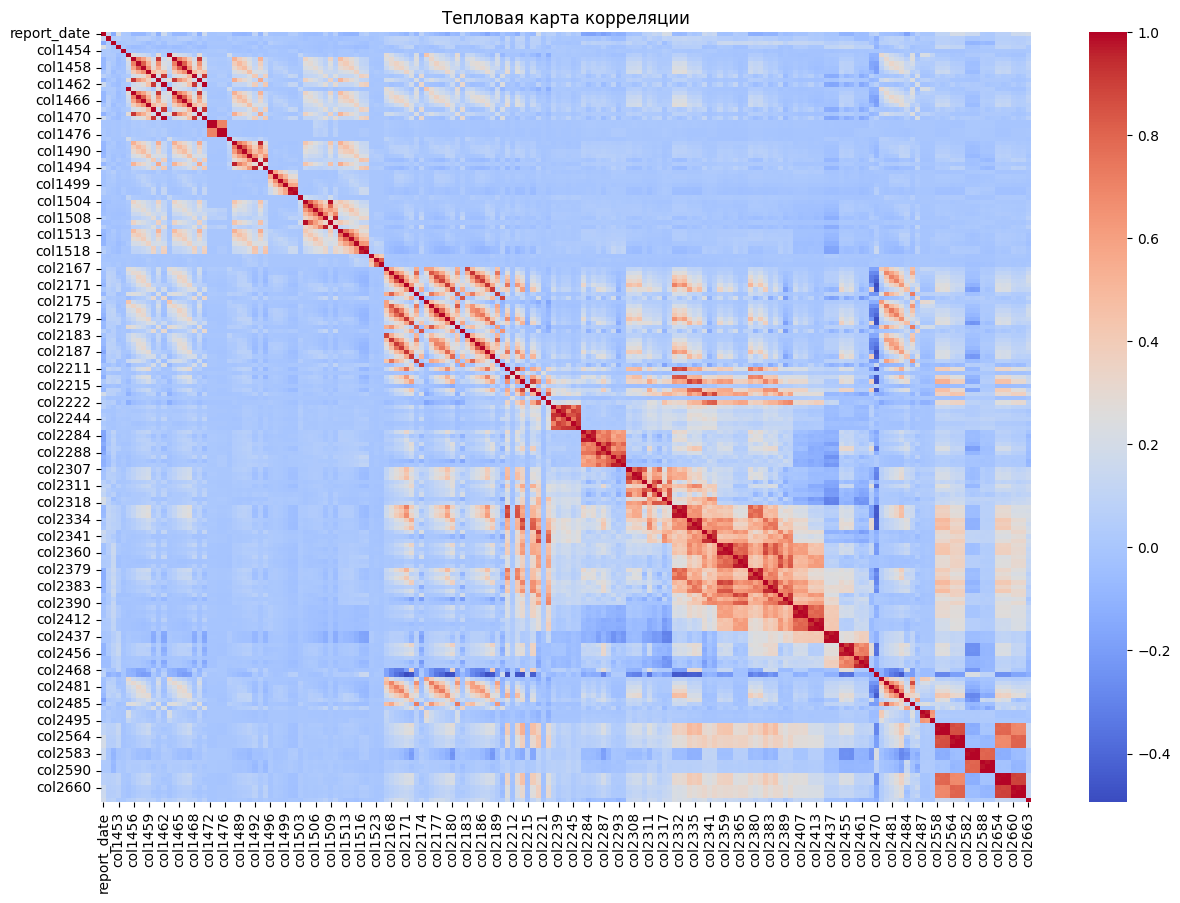

In [442]:
correlation_matrix = df_obr.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Тепловая карта корреляции')
plt.show()

Теперь обработка 2 датафрейма подгонка под обработанный

In [443]:
df1 = set(df_obr)
df2 = set(test)

df1 = df_obr.copy()
df2 = test.copy()

df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

columns_file1 = set(df1.columns)
columns_file2 = set(df2.columns)

columns_to_drop = list(columns_file2 - columns_file1)

df2_cleaned = df2.drop(columns=columns_to_drop, axis=1)
df2_cleaned.head()



,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,0,0151dccf-0ecb-ed11-b828-005056b81dee,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,0,074ce8a6-859a-4084-a1c6-41343a94a856,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,0,08e72a9b-74fd-450a-982e-a8cede3facb3,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,0,0a033230-3889-4239-8900-0ffb7e48958c,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348


<Axes: >

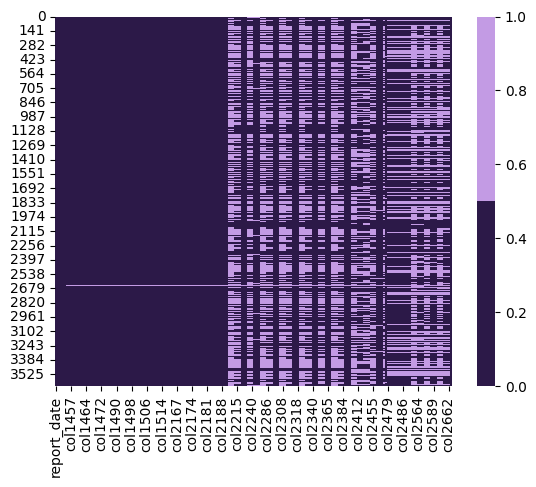

In [444]:
cols = df2_cleaned.columns

colours = ['#2c1948', '#c39be4']
sns.heatmap(df2_cleaned[cols].isnull(), cmap=sns.color_palette(colours))

<Axes: >

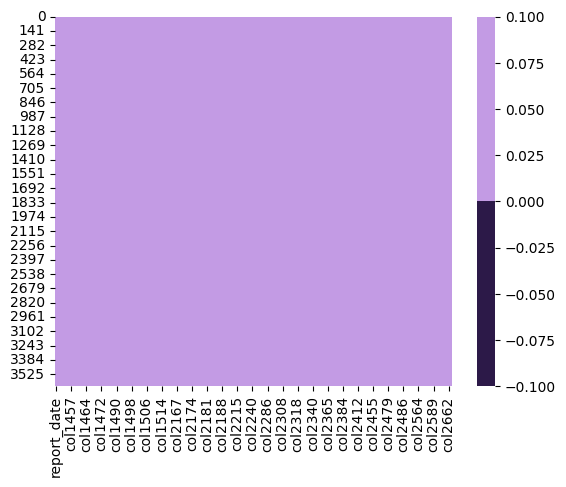

In [445]:
df22 = df2_cleaned.fillna(df2_cleaned.median(numeric_only=True))
ols = df22.columns

colours = ['#2c1948', '#c39be4']
sns.heatmap(df22[cols].isnull(), cmap=sns.color_palette(colours))

In [446]:

column_name = 'target' 
count_ones = df22[column_name].sum()
total_rows = df22[column_name].count()
percentage_ones = (count_ones / total_rows) * 100

print(f"Количество 1 в колонке '{column_name}': {count_ones}")
print(f"Процент 1 в колонке '{column_name}': {percentage_ones:.2f}%")

Количество 1 в колонке 'target': 66
Процент 1 в колонке 'target': 1.81%


In [447]:
label_encoder = LabelEncoder()
for column in df22.select_dtypes(include=['object']).columns:
    df22[column] = label_encoder.fit_transform(df22[column])

print(df22.head())

   report_date  client_id  target  col1453  col1454  col1455  col1456  \
0            1          2       0        0       16      0.0      0.0   
1            2          4       0        0       18      0.0      0.0   
2            2          9       0        0       93      0.0      0.0   
3            0         12       0        0      108      0.0      0.0   
4            0         14       0        0      120      0.0      0.0   

   col1457  col1458  col1459  ...  col2588  col2589  col2590     col2654  \
0      0.0      0.0      0.0  ...    240.0    240.0    240.0   4941670.0   
1      1.0      1.0      1.0  ...    360.0    360.0    360.0  11789500.0   
2      0.0      0.0      0.0  ...    348.0    348.0    348.0   7000000.0   
3      0.0      0.0      0.0  ...    300.0    300.0    300.0   7737230.5   
4      0.0      0.0      0.0  ...    362.0    362.0    362.0   7737230.5   

      col2655     col2656     col2660     col2661     col2662   col2663  
0   4941670.0   4941670.0   49

In [448]:
# threshold = 0.1


# low_corr_columns = df22.columns[(df22.abs() < threshold).all()]
# low_corr_data = df22[low_corr_columns]
# df2_2 = df22.drop(columns=low_corr_data)
# df1_1 = df_obr.drop(columns=low_corr_columns)
# df22.to_csv('val.csv', index=False)
# df_obr.to_csv('trein.csv', index=False)
df2_2 = df22
df1_1 = df_obr 

конечные обработанные это обуч = df_obr df1_1 и тест = df22 df2_2

ПРобуем стоить модельку


In [449]:

X_train = df1_1.drop(columns='target') 
y_train = df1_1['target']

X_test = df2_2.drop(columns='target') 
y_test = df2_2['target'] 
model = LogisticRegression(random_state=4, max_iter=4000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")


Точность модели: 0.98
ROC-AUC: 0.54


c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [450]:
# column_name = 'target' 
# count_ones = y_pred_proba[column_name].sum()
# total_rows = y_pred_proba[column_name].count()
# percentage_ones = (count_ones / total_rows) * 100

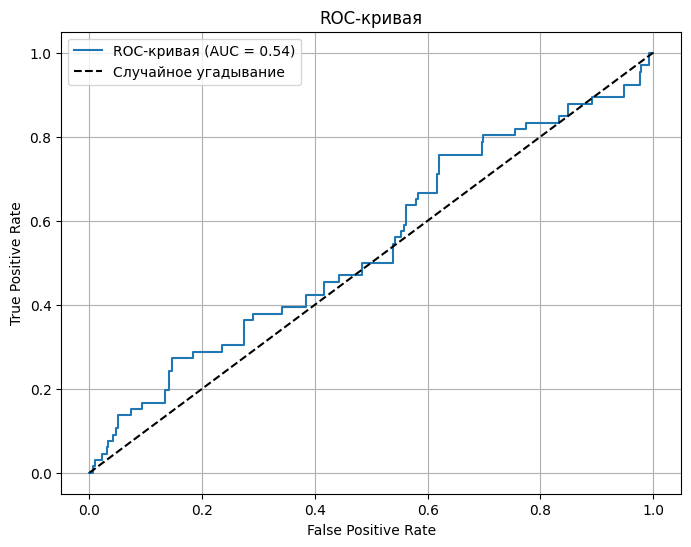

In [451]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Случайное угадывание")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid()
plt.show()

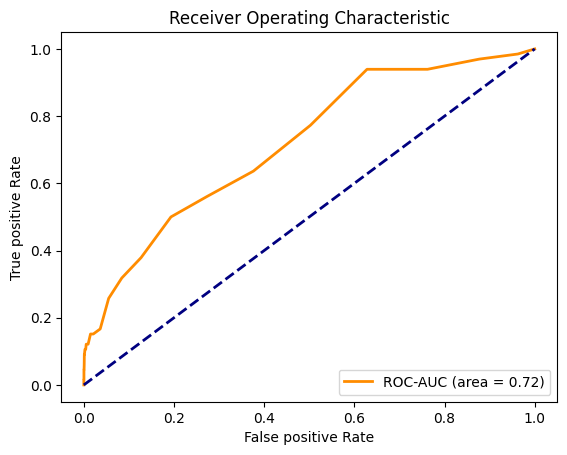

In [452]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

по идее это и есть результат baseline модели